Trabajo Final - Tratamiento de Datos:

Emilio buen dia , en este programa busco hacer un webscrapper (con un archivo) a una pagina web , que es la pagina que publique en el debate para mi dataset, se me ocurrio la idea de ingresar a la pagina, hacer el login en la misma y descargarme el archivo , no me fije que estaba en .zip asi que tambien lo descomprimi y lo coloque en la carpeta de mi proyecto,( estoy conciente que estos archivos deberan borrarse a futuro para no causar problemas de reemplazo de archivos), asi mismo te ire detallando las acciones que fui realizando como comentarios dentro del codigo, 
Saludos.. Edison

In [5]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import pandas as pd
import time

driver = webdriver.Chrome('C:/PROGRAMAS PYTHON/UIDE/chromedriver_win32/chromedriver.exe')

driver.get('https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29')
time.sleep(3)
driver.get('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/')
time.sleep(3)
driver.get('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data')


#<input required type="text" name="email" class="mdc-text-field__input" placeholder="Email/Username" 

#
#email ="edaguilarca@uide.edu.ec"#<label class="mdc-ripple-upgraded sc-eIWpXs eqQAhb mdc-text-field mdc-text-field--upgraded mdc-text-field--outlined mdc-text-field--invalid" aria-labelledby="textfield-Email/Username-label" style="--mdc-ripple-fg-size:238px; --mdc-ripple-fg-scale:1.7266; --mdc-ripple-fg-translate-start:210px, -97px; --mdc-ripple-fg-translate-end:79.5px, -91px;">flex
#password= "edaguilarca_uide"
#email_textfield = driver.find_element("name", "email")
ruta = "C:/Users/ediso/Downloads/wdbc.data"
#import shutil
#import urllib.request
#from contextlib import closing

#with closing(urllib.request.urlopen('ftp://server/path/to/file')) as r:
#    with open('file', 'wb') as f:
#        shutil.copyfileobj(r, f)



#password_textfield = driver.find_element("name", "password")
#login_button = driver.find_element("xpath", "/html/body/main/div[1]/div/div[2]/form/div[2]/div[3]/button/span")
#email_textfield.send_keys(email)
#time.sleep(1)#<button class="sc-fHsOPI bPJXqx" type="submit" tabindex="0" role="button">flex
#password_textfield.send_keys(password)
#time.sleep(2)
#login_button.click()
#time.sleep(5)


#descargo el fichero en mi carpeta de descargas  como el formato es ZIP debo descomprimirlo:
#driver.get('https://www.kaggle.com/datasets/neuromusic/avocado-cancer/download?datasetVersionNumber=1')

#time.sleep(5)
#import zipfile
#ruta_zip = "C:/Users/ediso/Downloads/archive.zip"
#ruta_extraccion = "C:/PROGRAMAS PYTHON/"
#password = None
#archivo_zip = zipfile.ZipFile(ruta_zip, "r")
#try:
#    print(archivo_zip.namelist())
#    archivo_zip.extractall(pwd=password, path=ruta_extraccion)
#except:
#    pass
#archivo_zip.close()


C:\Users\ediso\AppData\Local\Temp\ipykernel_15868\4288556193.py:6: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/PROGRAMAS PYTHON/UIDE/chromedriver_win32/chromedriver.exe')


Una vez descargado el dataset de la pagina web y extraido en la carpeta del proyecto , unicamente me toca trabajar con el mediante el empleo de la libreria de pandas y sus funciones respectivas:

In [7]:
import pandas as pd
import numpy as np
import datetime as dt
#leemos el fichero .csv
df_cancer = pd.read_csv(ruta)
#visualizamos su ifnormacion para verificar una carga correcta
df_cancer.head()
df_cancer.info()

break

###################Limpieza de datos##################
#convertirmos PRICE a tipo float para asegurarnos que la informacion dentro de las celdas sea un decimal y no contena otro tipo de informaicion
df_cancer['AveragePrice'] = df_cancer['AveragePrice'].astype('float')

#Para asegurarnos que la conversion fue correcta utilizamos la declaracion assert
assert df_cancer['AveragePrice'].dtype == 'float'

#Finalmente conocemos cual es la media de la columna price
print(df_cancer['AveragePrice'].mean())

#SACO LA MEDIA PARA VER CUAL ES MI VALOR PROMEDIO DE todo EL DATASET y tener un valor de referencia con el cual trabajar a futuro , la verdad fue una corazonada para tratar de reducir la cantidad de informaicon

res = np.median(df_cancer['AveragePrice'], axis=None, out=None, overwrite_input=False, keepdims=False)
print(res)
#############################################################
#con el rewultado de la media de 1.37 trabaje en data que este un 15% menos y todas las superiores a esta.
reference_value = res - (res*0.15)
print("El minimo valor de referencia es:   ",reference_value)
#valor de referencia 1.1645

#usamos loc para seleccionar todo esos registros mayores a 1.1645 
df_cancer.loc[df_cancer['AveragePrice'] > 1.1645]
print("describimos ")
print(df_cancer.head(10))

###############################################################
#convertimos el tipo de dato que conocemos que es fecha a datetime
infer_datetime_format=True
df_cancer['Date'] = pd.to_datetime(df_cancer['Date']).dt.date
#almacenamos la fecha de hoy para si de ser posible utilizarlo despues
today = dt.date.today()

# y por ultimo le aplicamos la fecha de hoy almacenada en today a aquellos registros con
#fechas futuras, es decir con fechas superiores a hoy
df_cancer.loc[df_cancer['Date'] > today, 'Date'] = today

#mostramos la fecha maxima por esto no muestra actual porq esta comleta hasta el 2018, por lo tanto no existieron campos sin fecha

print(df_cancer['Date'].max())


# Aqui buscamos duplicados 
duplicates = df_cancer.duplicated('AveragePrice', keep = False)

# ordenamos por la columna AVGprice los registros duplicados obtenidos
df_cancer = df_cancer[duplicates].sort_values( by = 'AveragePrice')

# y por ultimo imprimimos los datos duplicados, mostramos 
#en cuales columnas estaban estos registros
print(df_cancer[['AveragePrice','Date','region']])


print("AHORA IMPRIMIMOS UNA COMPRABACION SI HAY DUPLICADOS ")#deberia estar vacio o cero en su tamaño para validar que se quitaron duplicados
df_cancer = df_cancer.drop_duplicates(subset= 'AveragePrice', keep= "first")
#verificamos que no existan los duplicados imprimiendo la infomraicon nuevamente
print(df_cancer[['AveragePrice','Date','region']])



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 32 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   842302    568 non-null    int64  
 1   M         568 non-null    object 
 2   17.99     568 non-null    float64
 3   10.38     568 non-null    float64
 4   122.8     568 non-null    float64
 5   1001      568 non-null    float64
 6   0.1184    568 non-null    float64
 7   0.2776    568 non-null    float64
 8   0.3001    568 non-null    float64
 9   0.1471    568 non-null    float64
 10  0.2419    568 non-null    float64
 11  0.07871   568 non-null    float64
 12  1.095     568 non-null    float64
 13  0.9053    568 non-null    float64
 14  8.589     568 non-null    float64
 15  153.4     568 non-null    float64
 16  0.006399  568 non-null    float64
 17  0.04904   568 non-null    float64
 18  0.05373   568 non-null    float64
 19  0.01587   568 non-null    float64
 20  0.03003   568 non-null    float6

SyntaxError: 'break' outside loop (2054700422.py, line 10)

In [ ]:
#asginamos una nueva columna en relacion de nuestra media anterior mas un porcentaje adicional que nos daria 1.46 considerando un aumento en la media para enfocarnos en precios de aguacate mas altos en busca de oportunidad
df_cancer['RESPUESTA'] = df_cancer['AveragePrice'].apply(lambda x: "FACTIBLE" if x>=1.46 else "NO-FACTIBLE")
df_cancer.head(10)
#######################################


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,RESPUESTA
1716,0,2015-12-27,0.49,1137707.43,738314.80,286858.37,11642.46,100891.80,70749.02,30142.78,0.00,conventional,2015,PhoenixTucson,NO-FACTIBLE
16162,43,2017-03-05,0.51,17135.45,481.81,1790.33,0.00,14863.31,122.78,14740.53,0.00,organic,2017,Nashville,NO-FACTIBLE
15314,43,2017-03-05,0.52,32113.68,702.06,3007.87,0.00,28403.75,1850.64,26553.11,0.00,organic,2017,Columbus,NO-FACTIBLE
1744,28,2015-06-14,0.53,1353850.06,1046887.77,180388.89,4263.45,122309.95,94240.24,28069.71,0.00,conventional,2015,PhoenixTucson,NO-FACTIBLE
1743,27,2015-06-21,0.54,1343180.92,1028045.58,188115.35,4910.71,122109.28,99129.04,22980.24,0.00,conventional,2015,PhoenixTucson,NO-FACTIBLE
4556,32,2016-05-15,0.55,1318932.22,877701.71,266908.38,13478.11,160844.02,60965.94,99187.80,690.28,conventional,2016,PhoenixTucson,NO-FACTIBLE
5454,46,2016-02-07,0.56,822548.66,385584.08,189389.79,105.28,247469.51,98976.22,148493.29,0.00,conventional,2016,Tampa,NO-FACTIBLE
1754,38,2015-04-05,0.57,1320320.85,1058164.41,172115.69,7128.12,82912.63,49271.61,33641.02,0.00,conventional,2015,PhoenixTucson,NO-FACTIBLE
4258,46,2016-02-07,0.58,542750.89,348348.45,55886.98,566.50,137948.96,114075.87,23873.09,0.00,conventional,2016,NewOrleansMobile,NO-FACTIBLE
4102,46,2016-02-07,0.59,1180631.07,649646.72,241271.36,231.23,289481.76,71559.97,217921.79,0.00,conventional,2016,MiamiFtLauderdale,NO-FACTIBLE


<AxesSubplot:>

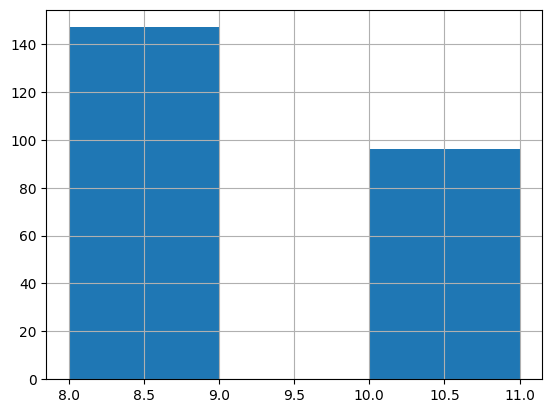

In [ ]:

# los resultados anteriores los podemos representar en un histograma para observar las tendencias y segun el tratamiento que hemos realizado quedarian asi:
#De un total de 243 registros se tiene como TOP :  FACTIBLE con 147 vs 96 NO FACTIBLE segun se puede apreciar en el siguiente histograma.
df_cancer['RESPUESTA'].apply(len).hist(bins=3)



       Unnamed: 0  Total Volume
1716            0    1137707.43
16162          43      17135.45
15314          43      32113.68
1744           28    1353850.06
1743           27    1343180.92
...           ...           ...
16717          15      10297.07
14126           9      11252.48
14122           5      17436.41
14123           6      18930.40
16715          13      10741.93

[243 rows x 2 columns]
(243, 2)
(243,)


[Text(0.515625, 0.95, 'X[1] <= 54230.234\ngini = 0.485\nsamples = 162\nvalue = [95, 67]'),
 Text(0.3020833333333333, 0.85, 'X[0] <= 42.5\ngini = 0.221\nsamples = 95\nvalue = [83, 12]'),
 Text(0.13194444444444445, 0.75, 'X[0] <= 0.5\ngini = 0.139\nsamples = 80\nvalue = [74, 6]'),
 Text(0.05555555555555555, 0.65, 'X[1] <= 10293.16\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.027777777777777776, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.08333333333333333, 0.55, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.20833333333333334, 0.65, 'X[1] <= 15900.725\ngini = 0.12\nsamples = 78\nvalue = [73, 5]'),
 Text(0.1388888888888889, 0.55, 'X[0] <= 6.0\ngini = 0.068\nsamples = 57\nvalue = [55, 2]'),
 Text(0.08333333333333333, 0.45, 'X[0] <= 4.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.05555555555555555, 0.35, 'gini = 0.0\nsamples = 4\nvalue = [4, 0]'),
 Text(0.1111111111111111, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.19444444444444445, 0.45, '

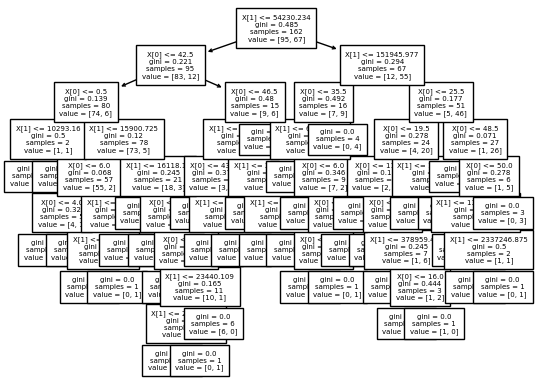

In [ ]:
#mediante el empleo de Sklearn generamos el arbol de decision en base a nuestras predicciones 
from sklearn.model_selection import train_test_split
from sklearn import tree

#utilizare las columnas index , Avg price y Total amount para mi modelo
X = df_cancer.iloc[:,[0,3]]
print(X)
Y=df_cancer['RESPUESTA'] #utilizamos la columna adicional RESPUESTA ya que deseamos que se base en si ES FACTIBLE O NO 

print(X.shape)#verifico que los dimensionamientos de los array esten correctos para poder avanzar  en ambos campos
print(Y.shape)
#X = X.astype(float)

X.head()
Y.head()

X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.33,random_state=42)
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier() #empezamos a generar nuestro arbol de decision con toda la informacion que se ha trabajado
clf = clf.fit(X_train, y_train)
clf.get_params()

predictions = clf.predict(X_test)
predictions #obtengo el array de las predicciones para visualizar que este todo correcto
y_pred = clf.predict(X_test)
#y_true = clf.predict(X_train)
#fianlmente grafico el arbol de decision 
tree.plot_tree(clf,fontsize=5)
#from sklearn.metrics import accuracy_score
#accuracy_score()